In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage import io

In [2]:
img_file = './res/bird_pic.png'

In [3]:
img = io.imread(img_file)

Image shape: (680, 608)


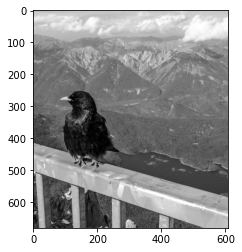

In [4]:
print('Image shape: {}'.format(img.shape))
plt.imshow(img, cmap='gray')

In [5]:
# To feed this img to Tensorflow operation, we will first convert it into a Tensor:
img = tf.convert_to_tensor(img, dtype=tf.float32, name='input_image')

In [6]:
"""As most of the Tensorflow operations are meant for batches image, i.e. of shape (B x H x W x D),
we will expand the dimension of the image into a batch of one single image:"""
img = tf.expand_dims(tf.expand_dims(img, 0), -1)

In [7]:
print('Tensor shape: {}'.format(img.shape))

Tensor shape: (1, 680, 608, 1)


In [8]:
# Define 3 x 3 filer commonly used to blur img (Gaussian blur):
kernel = tf.constant([[1 / 16, 2 / 16, 1 / 16], 
                      [2 / 16, 4 / 16, 2 / 16],
                      [1 / 16, 2 / 16, 1 / 16]], dtype=tf.float32, name='gaussian_kernel')

In [9]:
"""However, the convolution method requires kernel tensor to be of shape (k, k, D, N) (with k is the size of 
the square matrix, N is the number of kernels). Through D = 1 and N = 1 in our case, we still need to reshape
our filter."""
kernel = tf.expand_dims(tf.expand_dims(kernel, -1), -1)

In [10]:
print('Kernel shape: {}'.format(kernel.shape))

Kernel shape: (3, 3, 1, 1)


In [11]:
blur_img = tf.nn.conv2d(img, kernel, strides=[1, 1, 1, 1], padding='SAME')

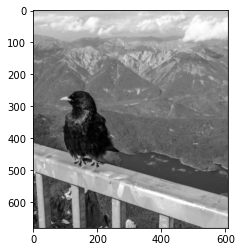

In [12]:
plt.imshow(blur_img[0, ..., 0], cmap='gray')

In [13]:
# Defind contour detection
kernel = tf.constant([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]], dtype=tf.float32, name='contour_kernel')
kernel = tf.expand_dims(tf.expand_dims(kernel, -1), -1)

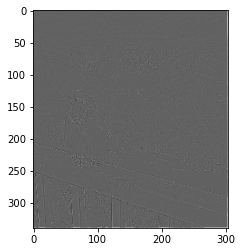

In [14]:
edge_img = tf.nn.conv2d(img, kernel, strides=[1, 2, 2, 1], padding='SAME')
edge_res = edge_img.numpy()
plt.imshow(edge_res[0, ..., 0], cmap='gray')

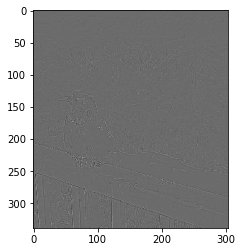

In [15]:
edge_img = tf.nn.conv2d(img, kernel, strides=[1, 2, 2, 1], padding='VALID')
edge_res = edge_img.numpy()
plt.imshow(edge_res[0, ..., 0], cmap='gray')

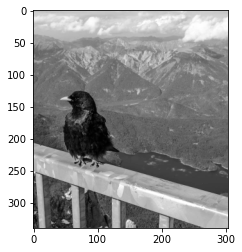

In [16]:
# Average Pooling
avg_pooling_img = tf.nn.avg_pool(img, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
avg_pooling_res = avg_pooling_img.numpy()[0, ..., 0]
plt.imshow(avg_pooling_res, cmap='gray')

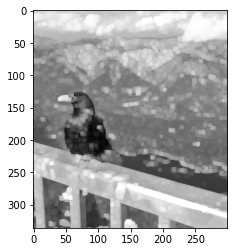

In [23]:
# Max pooling
max_pooling_img = tf.nn.max_pool(img, ksize=[1, 10, 10, 1], strides=[1, 2, 2, 1], padding='VALID')
max_pooling_res = max_pooling_img.numpy()[0, ..., 0]
plt.imshow(max_pooling_res, cmap='gray')